<a href="https://colab.research.google.com/github/AbuKaisar24/Bengali-Word2vce-Using-Deep-Learning/blob/master/Bengali_w2v_for_text_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
df=pd.read_excel('gdrive/My Drive/Colab Notebooks/newdata.xlsx')

In [0]:
df.head(5)

,Post Type,Text,Summary
0,page,আগে যখন আমি ফুটবল বুঝতাম না ও দেখতাম না তখন ভা...,মেসি সবার সেরা।
1,page,অগ্নিকান্ডের সময় আমাদের করণীয় তো আমরা সবাই জান...,অগ্নিকান্ডের সময় উপস্থিত জনগণের করণীয়।
2,personal,ড্যাফোডিলের মেইন ক্যাম্পাসটারে ধানমন্ডি থেইকা ...,জ্যামের জন্য এক্সাম মিস ।
3,page,পাইপ বয় নাঈমকে খালেদা জিয়ার বিরুদ্ধে কথাটি শিখ...,নাঈমকে টাকা দেয়া হচ্ছে ।
4,personal,"সাংবাদিক উজ্জ্বল সে একজন প্রতারক,সামন্য অর্থের...",উজ্জ্বল অর্থের প্রয়োজনে মিথ্যা সংবাদ প্রচার করে।


In [0]:
df.isnull().sum()

Post Type    0
Text         0
Summary      0
dtype: int64

In [0]:
df=df.dropna()
df=df.drop("Post Type",axis=1)
df=df.reset_index(drop=True)

In [0]:

df.head()

,Text,Summary
0,আগে যখন আমি ফুটবল বুঝতাম না ও দেখতাম না তখন ভা...,মেসি সবার সেরা।
1,অগ্নিকান্ডের সময় আমাদের করণীয় তো আমরা সবাই জান...,অগ্নিকান্ডের সময় উপস্থিত জনগণের করণীয়।
2,ড্যাফোডিলের মেইন ক্যাম্পাসটারে ধানমন্ডি থেইকা ...,জ্যামের জন্য এক্সাম মিস ।
3,পাইপ বয় নাঈমকে খালেদা জিয়ার বিরুদ্ধে কথাটি শিখ...,নাঈমকে টাকা দেয়া হচ্ছে ।
4,"সাংবাদিক উজ্জ্বল সে একজন প্রতারক,সামন্য অর্থের...",উজ্জ্বল অর্থের প্রয়োজনে মিথ্যা সংবাদ প্রচার করে।


In [0]:
for i in range(5):
    print("Reviews:",i+1)
    print("Summary:",df.Summary[i])
    print("Text:",df.Text[i])

Reviews: 1
Summary: মেসি সবার সেরা।
Text: আগে যখন আমি ফুটবল বুঝতাম না ও দেখতাম না তখন ভাবতাম মেসিই সেরা। তারপর যখন আমি ফুটবল বোঝা ও দেখা শুরু করলাম তখন উপলব্ধি করলাম যে,আগে আমি ভুল ছিলাম না।
Reviews: 2
Summary: অগ্নিকান্ডের সময় উপস্থিত জনগণের করণীয়।
Text: অগ্নিকান্ডের সময় আমাদের করণীয় তো আমরা সবাই জানি। কিন্তু আমরা কি জানি, যেকোনো অগ্নিকান্ডের সময় দুর্ঘটনাস্থলে উপস্থিত থাকা সাধারণ জনগনের করণীয় কি? চলুন জেনে নেই দুর্ঘটনাস্থলে উপস্থিত থাকা সাধারণ জনগনের করণীয়গুলো। প্রয়োজনীয় কিছু পদক্ষেপ গ্রহন করে মূল্যবান জীবন বাঁচাই।
Reviews: 3
Summary:  জ্যামের জন্য এক্সাম মিস ।
Text: ড্যাফোডিলের মেইন ক্যাম্পাসটারে ধানমন্ডি থেইকা গাবতলী ট্রান্সফারের জন্য একটা সিরিয়াস আন্দোলন দরকার।২ সেমিস্টার যাবত এই জ্যামের জন্য ৮ঃ৩০ টার একটা ক্লাস ও করতে পারি না...মজার রোড থেইক্কা কল্যাণপুর আসতেই লাগলো ২ ঘণ্টা...এতো সুন্দর জীবন দিয়া কি করবো যদি এক্সাম মিস হয়।
Reviews: 4
Summary: নাঈমকে টাকা দেয়া হচ্ছে ।
Text: পাইপ বয় নাঈমকে খালেদা জিয়ার বিরুদ্ধে কথাটি শিখিয়ে দেয়া হয়েছে দাবী তার মায়ের, বললেন ৫০০০ ডলার পুরস্কার ঘোষনাক

In [0]:
contractions = { 
"বি.দ্র ": "বিশেষ দ্রষ্টব্য",
"ড.": "ডক্টর",
"ডা.": "ডাক্তার",
"ইঞ্জি:": "ইঞ্জিনিয়ার",
"রেজি:": "রেজিস্ট্রেশন",
"মি.": "মিস্টার",
"মু.": "মুহাম্মদ",
"মো.": "মোহাম্মদ",
}

In [0]:
import re
import string
def clean_text(text,remove_stopwords = False):
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    # Format words and remove unwanted characters
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_digits = u"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]+"
    english_chars = u"[a-zA-Z0-9]"
    punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    bangla_fullstop = u"\u0964"     #bangla fullstop(dari)
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
    
    text = re.sub(bangla_digits, " ", text)
    text = re.sub(punc, " ", text)
    text = re.sub(english_chars, " ", text)
    text = re.sub(bangla_fullstop, " ", text)
    text = re.sub(punctSeq, " ", text)
    text = whitespace.sub(" ", text).strip()
    
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;‘:‘ ’', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]। ,', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r"[\@$#%~+-\.\'।\"]"," ",text)
    text = re.sub(r"(?m)^\s+", "", text)
    text = re.sub("[()]","",text)
    text = re.sub("[‘’]","",text)
    text = re.sub("[!]","",text)
    text = re.sub("[/]","",text)
    text = re.sub("[:]","",text)
    text= re.sub('\ |\?|\.|\!|\/|\;|\:', ' ',text)
    text= text.strip("/")
    
    if remove_stopwords:
        k = []
        with open('gdrive/My Drive/Colab Notebooks/Banglastopword.txt', 'r',encoding="utf-8") as f:
            for word in f:
                word = word.split()
                k.append(word[0])
            text = [t for t in text if t not in k]
            text = "".join(text)
            
    return text

In [0]:
clean_summaries = list()
for summary in df.Summary:
    clean_summaries.append(clean_text(summary,remove_stopwords=False).split())
print("Summaries are complete.")

clean_texts = list()
for text in df.Text:
    clean_texts.append(clean_text(text).split())
print("Texts are complete.")

Summaries are complete.
Texts are complete.


In [0]:
for i in range(5):
    print("Clean Text:#",i+1)
    print("Clean Summary:",clean_summaries[i])
    print("Clean Text:",clean_texts[i])
    print()

Clean Text:# 1
Clean Summary: ['মেসি', 'সবার', 'সেরা']
Clean Text: ['আগে', 'যখন', 'আমি', 'ফুটবল', 'বুঝতাম', 'না', 'ও', 'দেখতাম', 'না', 'তখন', 'ভাবতাম', 'মেসিই', 'সেরা', 'তারপর', 'যখন', 'আমি', 'ফুটবল', 'বোঝা', 'ও', 'দেখা', 'শুরু', 'করলাম', 'তখন', 'উপলব্ধি', 'করলাম', 'যে', 'আগে', 'আমি', 'ভুল', 'ছিলাম', 'না']

Clean Text:# 2
Clean Summary: ['অগ্নিকান্ডের', 'সময়', 'উপস্থিত', 'জনগণের', 'করণীয়']
Clean Text: ['অগ্নিকান্ডের', 'সময়', 'আমাদের', 'করণীয়', 'তো', 'আমরা', 'সবাই', 'জানি', 'কিন্তু', 'আমরা', 'কি', 'জানি', 'যেকোনো', 'অগ্নিকান্ডের', 'সময়', 'দুর্ঘটনাস্থলে', 'উপস্থিত', 'থাকা', 'সাধারণ', 'জনগনের', 'করণীয়', 'কি', 'চলুন', 'জেনে', 'নেই', 'দুর্ঘটনাস্থলে', 'উপস্থিত', 'থাকা', 'সাধারণ', 'জনগনের', 'করণীয়গুলো', 'প্রয়োজনীয়', 'কিছু', 'পদক্ষেপ', 'গ্রহন', 'করে', 'মূল্যবান', 'জীবন', 'বাঁচাই']

Clean Text:# 3
Clean Summary: ['জ্যামের', 'জন্য', 'এক্সাম', 'মিস']
Clean Text: ['ড্যাফোডিলের', 'মেইন', 'ক্যাম্পাসটারে', 'ধানমন্ডি', 'থেইকা', 'গাবতলী', 'ট্রান্সফারের', 'জন্য', 'একটা', 'সিরিয়াস', 'আন্দোলন', 'দরকার', 

In [0]:
total=clean_summaries+clean_texts

In [0]:
from gensim.models import Word2Vec

In [0]:
model1 = Word2Vec(total, size=100, window=5, min_count=3, workers=4)##CBOW =Continous Bag of Word Model


In [0]:
vector = model1.wv['দেশের']

In [0]:
model1.train([["করা", "বিভিন্ন"]], total_examples=1, epochs=1)

(1, 2)

In [0]:
model1.wv.similarity("অনুভূতিতে", 'অনুষ্ঠানে')

KeyError: ignored

In [0]:
model1.most_similar('কথাটি')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


KeyError: ignored

In [0]:
w1 = "রয়েছে"
model1.wv.most_similar(positive=w1, topn=5)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('হওয়ার', 0.45479491353034973),
 ('হয়', 0.4218379259109497),
 ('থাকে', 0.39213213324546814),
 ('ই', 0.3885713815689087),
 ('থেকে', 0.38511043787002563)]

In [0]:
w1 = ["আদেশ","রয়েছে"]
w2 = ["হাইকোর্ট"]
model1.wv.most_similar (positive=w1,negative=w2,topn=2)


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('বিশ্ববিদ্যালয়ের', 0.8566636443138123), ('রহমান', 0.8540797233581543)]

In [0]:
model1.wv.doesnt_match(["আদেশ","রয়েছে","হাইকোর্ট"])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'আদেশ'

In [0]:
import gensim
model = gensim.models.Word2Vec(size=150, window=10, min_count=2, sg=1, workers=10,hs=1, negative=0)###Skip gram model
model.build_vocab(total) 

In [0]:
model.train(sentences=clean_texts, total_examples=len(clean_texts), epochs=model.iter)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


(24850, 38120)

In [0]:
word_vectors = model.wv
count = 0
for word in word_vectors.vocab:
    if count<10:
        print(word)
        count += 1
    else:
        break

সবার
সেরা
অগ্নিকান্ডের
উপস্থিত
করণীয়
জ্যামের
জন্য
এক্সাম
মিস
নাঈমকে


In [0]:
len(word_vectors.vocab)

3460

In [0]:
vector = model.wv["জামিন"]  # numpy vector of a word
len(vector)

150

In [0]:
vector

array([-0.01905205, -0.09883868,  0.01179553, -0.0072283 ,  0.03880595,
        0.15099534,  0.03405221, -0.07358872,  0.00626585, -0.00656074,
       -0.11463318,  0.11067111, -0.09956057, -0.03709912,  0.00714606,
       -0.04249815,  0.02852961, -0.02491845,  0.14633165,  0.0641901 ,
        0.01981397,  0.14591838,  0.04140938, -0.10721926, -0.10461261,
        0.00191285, -0.15252918,  0.03902702,  0.05683518, -0.01631759,
       -0.06216676, -0.12250131,  0.02768621, -0.02863411,  0.0772407 ,
        0.03592367,  0.0438365 , -0.03529637,  0.05672446, -0.07993518,
        0.00616634,  0.05347052,  0.08410181, -0.14016028, -0.08237861,
        0.15456283, -0.01902347,  0.15625322,  0.06321923,  0.05801218,
       -0.08968768,  0.01585579, -0.06012369, -0.07716168,  0.08419304,
       -0.12317035,  0.08982027,  0.03778033, -0.16919596,  0.08239906,
        0.03288053, -0.10968972, -0.03882129,  0.00627917, -0.1033539 ,
       -0.00417633, -0.01708231,  0.06642231,  0.01907435,  0.09

In [0]:
wanted_words = []
count = 0
for word in word_vectors.vocab:
    if count<150:
        wanted_words.append(word)
        count += 1
    else:
        break
wanted_vocab = dict((k, word_vectors.vocab[k]) for k in wanted_words if k in word_vectors.vocab)
wanted_vocab

{'অগ্নিকান্ডের': <gensim.models.keyedvectors.Vocab at 0x7fcc46a77080>,
 'অনেক': <gensim.models.keyedvectors.Vocab at 0x7fcc46a77748>,
 'অর্থের': <gensim.models.keyedvectors.Vocab at 0x7fcc46a77320>,
 'অসাধারণ': <gensim.models.keyedvectors.Vocab at 0x7fcc558045c0>,
 'অ্যালেনের': <gensim.models.keyedvectors.Vocab at 0x7fcc46a791d0>,
 'আগুনে': <gensim.models.keyedvectors.Vocab at 0x7fcc46a79780>,
 'আজকে': <gensim.models.keyedvectors.Vocab at 0x7fcc46a79470>,
 'আজকের': <gensim.models.keyedvectors.Vocab at 0x7fcc46a79630>,
 'আটকা': <gensim.models.keyedvectors.Vocab at 0x7fcc46a79400>,
 'আধার': <gensim.models.keyedvectors.Vocab at 0x7fcc55804908>,
 'আমাদের': <gensim.models.keyedvectors.Vocab at 0x7fcc46a79d30>,
 'আমার': <gensim.models.keyedvectors.Vocab at 0x7fcc46a77a58>,
 'আর্টিফিশিয়াল': <gensim.models.keyedvectors.Vocab at 0x7fcc46a796d8>,
 'আসার': <gensim.models.keyedvectors.Vocab at 0x7fcc46a79cc0>,
 'ইংরেজি': <gensim.models.keyedvectors.Vocab at 0x7fcc46a77828>,
 'ইংরেজীতে': <gensim.mo

In [0]:
model.wv.similarity("অনুভূতিতে", 'অনুষ্ঠানে')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.23969087

In [0]:
from sklearn.manifold import TSNE
X = model[wanted_vocab] # X is an array of word vectors, each vector containing 150 tokens
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


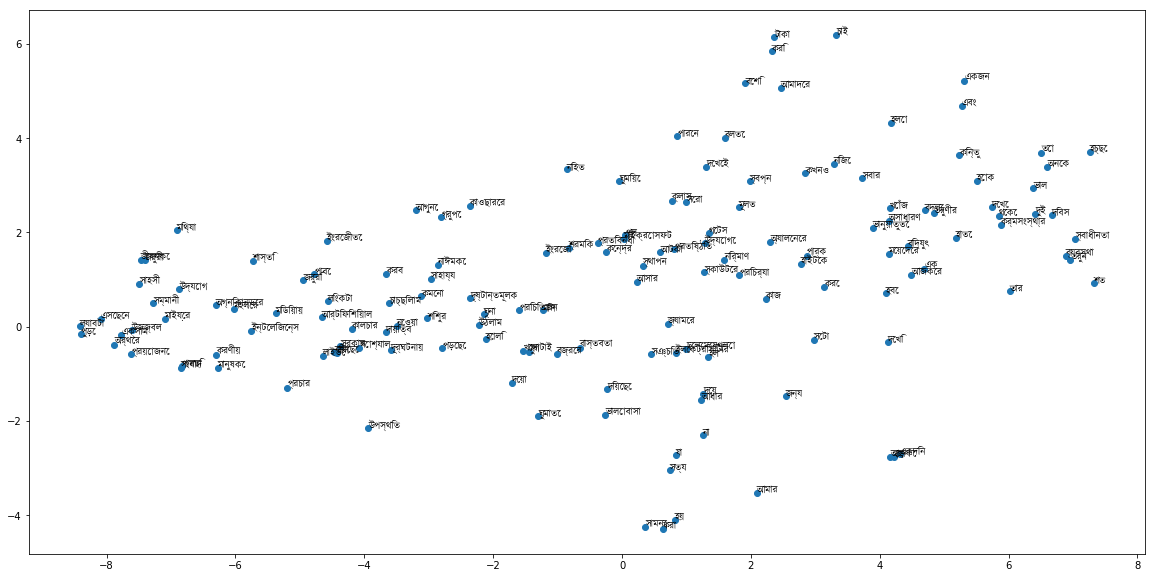

In [0]:
from __future__ import unicode_literals
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
prop = fm.FontProperties(fname='gdrive/My Drive/Colab Notebooks/kalpurush.ttf')

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(wanted_vocab)
for i, word in enumerate(words):
    plt.annotate(word,xy=(Y[i, 0], Y[i, 1]),fontproperties=prop)
_ = plt.show()

In [0]:
w1 = "রয়েছে"
model.wv.most_similar(positive=w1, topn=5)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('সার্জেন্ট', 0.9219517111778259),
 ('মালাইকা', 0.9069006443023682),
 ('পাচার', 0.8985224962234497),
 ('প্রবেশ', 0.8886803984642029),
 ('ফোন', 0.8814519643783569)]

In [0]:
w1 = ["আদেশ","রয়েছে"]
w2 = ["হাইকোর্ট"]
model.wv.most_similar (positive=w1,negative=w2,topn=2)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ঘটনা', 0.8936501145362854), ('ঘটে', 0.8595625162124634)]

In [0]:
model.wv.doesnt_match(["আদেশ","রয়েছে","হাইকোর্"])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'আদেশ'

In [0]:

model.wv.save_word2vec_format('gdrive/My Drive/Colab Notebooks/newbn2vec.txt', binary=False)

In [0]:
vectors = model.wv

In [0]:
vectors['আদেশ']

array([ 3.4340646e-02, -1.4447770e-01, -2.2405613e-02, -3.5527226e-02,
        4.1841298e-02,  4.3338276e-02, -2.5304098e-02, -7.0349509e-03,
        3.9064795e-02,  1.9103983e-02, -7.1124405e-02,  3.3424828e-02,
        1.3045648e-02, -2.4752296e-03,  7.2077587e-02, -6.2520131e-02,
        3.0254092e-02, -4.7548348e-03,  1.5664612e-01, -8.1704892e-03,
        4.8681755e-02,  1.0249443e-01,  3.6323261e-02, -1.2455931e-01,
       -1.5996188e-02,  2.9519605e-02, -1.4189434e-01,  4.7648544e-03,
        4.1718576e-03, -8.3789073e-02, -3.5468824e-02, -4.3730024e-02,
        2.2649389e-02,  1.4566500e-02, -4.3206657e-03,  4.0481076e-02,
       -7.3342845e-03,  8.7367427e-03,  5.3153150e-02, -1.1509159e-02,
        6.5223067e-03,  9.7681142e-02,  7.6561622e-02, -9.9995472e-02,
       -6.0270581e-02,  9.1639757e-02, -3.9641663e-02,  7.9244755e-02,
        7.2094403e-02,  1.8405484e-02, -4.3698773e-02,  3.6183018e-02,
       -4.5208409e-03, -9.7666696e-02,  8.7958582e-02, -1.1780605e-01,
      

In [0]:
vectors.most_similar('গত')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ডিসেম্বর', 0.834293782711029),
 ('ডিএসইর', 0.8232820630073547),
 ('সাত', 0.8043639063835144),
 ('ক্যান্টনমেন্ট', 0.803738534450531),
 ('থেকে', 0.7994199991226196),
 ('ডিএসইএক্সের', 0.7964879274368286),
 ('বিজিএমইএর', 0.792197048664093),
 ('দিনই', 0.7919877171516418),
 ('সার্কিট', 0.788041353225708),
 ('জমা', 0.7845744490623474)]

In [0]:
model.wv.similarity("অনুভূতিতে", 'অনুষ্ঠানে')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.23969087

In [0]:
len(model.wv.vocab)

3460

In [0]:

ordered_vocab = [(term, voc.index, voc.count) for term, voc in model.wv.vocab.items()]

ordered_vocab = sorted(ordered_vocab, key=lambda k: -k[2])
ordered_terms, term_indices, term_counts = zip(*ordered_vocab)
word_vectors = pd.DataFrame(model.wv.syn0norm[term_indices, :], index=ordered_terms)
word_vectors

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
ও,-0.023274,0.083137,0.089920,0.015980,0.100367,0.070254,0.022638,-0.161507,-0.104081,-0.087375,...,0.153565,-0.113419,0.149757,0.046813,-0.011081,-0.058260,0.056018,0.054235,-0.070780,0.018527
এ,-0.068498,0.023246,0.026276,-0.044112,-0.006338,0.187541,0.037391,-0.115107,-0.066464,-0.072475,...,0.150798,0.072725,0.186045,0.087469,-0.106859,0.054484,-0.025747,0.071247,0.097390,0.047740
করে,-0.124545,-0.003069,0.044147,0.062314,-0.009920,0.147168,0.034966,-0.069227,-0.012314,-0.120794,...,0.171206,-0.048032,0.146182,0.080859,0.009858,0.051179,0.078233,-0.018283,-0.033780,0.029549
থেকে,-0.118500,0.013042,-0.033362,0.062948,-0.017158,0.166081,0.220579,-0.135571,-0.045929,0.043867,...,0.048562,-0.063680,0.109154,-0.056770,-0.196367,0.010666,-0.102364,0.026727,0.045922,-0.108661
হয়েছে,-0.009079,-0.000631,-0.063750,0.002762,0.140206,0.119714,-0.090161,-0.220227,-0.107752,-0.077641,...,0.036236,0.035192,0.084278,-0.059504,-0.084574,0.052114,-0.002779,-0.017854,-0.009864,0.025830
করা,-0.002740,-0.005119,-0.047239,0.057258,0.144112,0.056367,0.006387,-0.226308,-0.031149,-0.052557,...,0.079623,0.004941,0.083657,-0.065032,-0.062610,0.019759,0.090309,-0.022291,-0.002871,0.039987
বলেন,-0.062678,0.019408,0.054477,-0.016372,-0.002870,0.168696,0.060742,-0.041634,0.031384,-0.048799,...,0.260979,-0.000851,0.061443,0.080843,-0.044777,0.073061,-0.003853,0.025400,0.096921,-0.062035
না,-0.110675,0.039317,0.025817,-0.050579,-0.049241,0.087611,-0.060220,0.042955,-0.113594,-0.034021,...,0.096566,0.056432,-0.106499,-0.015661,-0.013396,0.090891,-0.191435,-0.027700,0.054459,-0.128830
হয়,0.054619,-0.017256,0.007493,-0.008601,0.133938,0.105093,0.034310,-0.240183,-0.093994,-0.049177,...,0.049142,0.053324,0.182716,-0.005016,-0.108242,0.032654,0.012589,0.042921,0.023896,0.100152
এক,-0.029540,0.026556,0.028154,0.097217,0.052509,0.120739,0.046202,-0.115293,0.048280,-0.011234,...,0.165185,-0.053404,0.158740,0.010892,-0.047626,0.066642,0.072662,0.108156,0.089041,0.017860


In [0]:
def get_related_terms(token, topn=10):
    """
    look up the topn most similar terms to token
    and print them as a formatted list
    """

    for word, similarity in model.most_similar(positive=[token], topn=topn):
        print (word, round(similarity, 3))

In [0]:
get_related_terms(u'রিমান্ড')

লিয়াকত 0.972
আসামি 0.945
শিক্ষার্থীরা 0.923
আদালত 0.917
সোমবার 0.91
দায়ের 0.906
দল 0.905
রংপুরের 0.903
সাতকানিয়া 0.902
আসামির 0.895


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
get_related_terms(u'চিন্তা')

গঠনের 0.976
দমন 0.974
সেপ্টেম্বর 0.973
দুদক 0.967
ভোলা 0.959
মূলধারায় 0.954
পক্ষে 0.953
শিল্পমন্ত্রী 0.952
অভিযোগের 0.951
জিজ্ঞাসাবাদের 0.951


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
def word_algebra(add=[], subtract=[], topn=1):
    """
    combine the vectors associated with the words provided
    in add= and subtract=, look up the topn most similar
    terms to the combined vector, and print the result(s)
    """
    answers = model.most_similar(positive=add, negative=subtract, topn=topn)
    
    for term, similarity in answers:
        print(term)

In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne_input = word_vectors
tsne_input = tsne_input.head(300)

In [0]:
tsne_input

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
ও,-0.023274,0.083137,0.089920,0.015980,0.100367,0.070254,0.022638,-0.161507,-0.104081,-0.087375,...,0.153565,-0.113419,0.149757,0.046813,-0.011081,-0.058260,0.056018,0.054235,-0.070780,0.018527
এ,-0.068498,0.023246,0.026276,-0.044112,-0.006338,0.187541,0.037391,-0.115107,-0.066464,-0.072475,...,0.150798,0.072725,0.186045,0.087469,-0.106859,0.054484,-0.025747,0.071247,0.097390,0.047740
করে,-0.124545,-0.003069,0.044147,0.062314,-0.009920,0.147168,0.034966,-0.069227,-0.012314,-0.120794,...,0.171206,-0.048032,0.146182,0.080859,0.009858,0.051179,0.078233,-0.018283,-0.033780,0.029549
থেকে,-0.118500,0.013042,-0.033362,0.062948,-0.017158,0.166081,0.220579,-0.135571,-0.045929,0.043867,...,0.048562,-0.063680,0.109154,-0.056770,-0.196367,0.010666,-0.102364,0.026727,0.045922,-0.108661
হয়েছে,-0.009079,-0.000631,-0.063750,0.002762,0.140206,0.119714,-0.090161,-0.220227,-0.107752,-0.077641,...,0.036236,0.035192,0.084278,-0.059504,-0.084574,0.052114,-0.002779,-0.017854,-0.009864,0.025830
করা,-0.002740,-0.005119,-0.047239,0.057258,0.144112,0.056367,0.006387,-0.226308,-0.031149,-0.052557,...,0.079623,0.004941,0.083657,-0.065032,-0.062610,0.019759,0.090309,-0.022291,-0.002871,0.039987
বলেন,-0.062678,0.019408,0.054477,-0.016372,-0.002870,0.168696,0.060742,-0.041634,0.031384,-0.048799,...,0.260979,-0.000851,0.061443,0.080843,-0.044777,0.073061,-0.003853,0.025400,0.096921,-0.062035
না,-0.110675,0.039317,0.025817,-0.050579,-0.049241,0.087611,-0.060220,0.042955,-0.113594,-0.034021,...,0.096566,0.056432,-0.106499,-0.015661,-0.013396,0.090891,-0.191435,-0.027700,0.054459,-0.128830
হয়,0.054619,-0.017256,0.007493,-0.008601,0.133938,0.105093,0.034310,-0.240183,-0.093994,-0.049177,...,0.049142,0.053324,0.182716,-0.005016,-0.108242,0.032654,0.012589,0.042921,0.023896,0.100152
এক,-0.029540,0.026556,0.028154,0.097217,0.052509,0.120739,0.046202,-0.115293,0.048280,-0.011234,...,0.165185,-0.053404,0.158740,0.010892,-0.047626,0.066642,0.072662,0.108156,0.089041,0.017860


In [0]:
tsne = TSNE()
tsne_vectors = tsne.fit_transform(tsne_input.values)

In [0]:
tsne_vectors = pd.DataFrame(tsne_vectors,
                            index=pd.Index(tsne_input.index),
                            columns=[u'x_coord', u'y_coord'])

tsne_vectors.head()

,x_coord,y_coord
ও,-6.920152,15.514331
এ,-2.121257,-0.737378
করে,-6.311912,9.766167
থেকে,10.406846,1.859572
হয়েছে,-7.909820,2.097861


In [0]:
tsne_vectors[u'word'] = tsne_vectors.index

In [0]:
tsne_vectors.head()

,x_coord,y_coord,word
ও,-6.920152,15.514331,ও
এ,-2.121257,-0.737378,এ
করে,-6.311912,9.766167,করে
থেকে,10.406846,1.859572,থেকে
হয়েছে,-7.909820,2.097861,হয়েছে


In [0]:
from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm


In [0]:
model = Word2Vec(clean_texts, size=100, window=5, min_count=3, workers=4)


In [0]:

model.wv['করা']

array([-6.84990827e-03,  7.17212621e-04, -6.80482853e-03, -7.45643349e-03,
       -1.89300149e-03,  5.20854443e-03, -5.48253115e-03, -2.27233092e-03,
        7.28676096e-03, -3.95051809e-03, -6.86719827e-03,  2.17580143e-03,
       -6.91474834e-03, -2.85164011e-03,  8.04668013e-03, -4.79216734e-03,
        8.28405935e-03,  1.25517824e-03, -1.94439804e-03, -6.79420913e-03,
        9.07899998e-03, -4.96102776e-03,  2.46907794e-03, -5.21772448e-03,
       -3.37421638e-03, -1.29704755e-02,  6.58355246e-04,  5.37047256e-03,
        5.11290366e-03,  2.43411586e-03, -9.54264659e-04, -6.28693320e-04,
        4.44125524e-03,  1.49941607e-03, -1.62690447e-03,  2.76362989e-03,
        2.37153005e-03,  1.26938312e-03, -3.27285309e-03,  3.61192762e-03,
       -2.64948583e-03, -5.83000900e-03,  6.64355978e-03,  4.52329172e-03,
       -2.40860181e-03,  7.65221845e-03,  2.13468191e-03, -6.36665709e-03,
       -3.57410870e-04, -7.41994288e-03, -4.89823474e-03,  8.57910980e-03,
       -3.32460250e-03, -

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    prop = fm.FontProperties(fname='gdrive/My Drive/Colab Notebooks/kalpurush.ttf')
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                     fontproperties=prop)
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


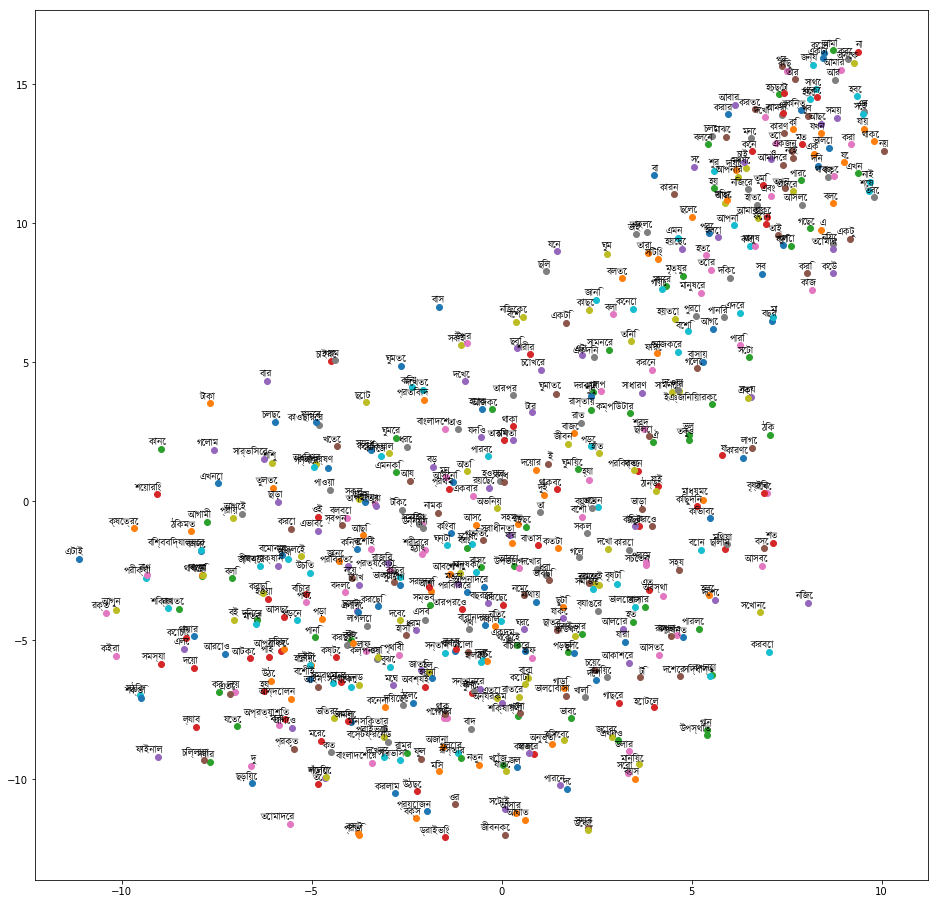

In [0]:
tsne_plot(model)

In [0]:
model.most_similar('গত')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ও', 0.9849309921264648),
 ('এ', 0.9834669828414917),
 ('করে', 0.9830952882766724),
 ('এক', 0.981412947177887),
 ('হয়েছে', 0.9797133803367615),
 ('না', 0.9786290526390076),
 ('সময়', 0.9783589839935303),
 ('থেকে', 0.9779884815216064),
 ('হয়', 0.9773203730583191),
 ('সঙ্গে', 0.9771814346313477)]

In [0]:
model.wv.similarity("অনুভূতিতে", 'অনুষ্ঠানে')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.36087334

In [0]:
model.wv.doesnt_match(["আদেশ","রয়েছে","হাইকোর্"])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'রয়েছে'

In [0]:
import gensim
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [0]:
model = gensim.models.KeyedVectors.load_word2vec_format('gdrive/My Drive/Colab Notebooks/word2vec.txt', binary=False)